### Задача 1

Из первого уравнения выразим:
$$I_s(g(2\rho_s-1)-1)=0\\
g(2\rho_s-1)-1=0\\
\rho_s=\frac{\frac{1}{g}+1}{2}$$

Из третьего уравнения:
$$\eta_w(J_{thr}-n_s-2F(\rho_s,n_s))=0 \Leftrightarrow n_s=\frac{J_{thr}}{1+2B(1-\rho_s)}$$

Из второго уравнения:
$$\eta_d(F(\rho_s,n_s)-\rho_s-I_s(2\rho_s-1))=0 \Leftrightarrow I_s=\frac{Bn_s(1-\rho_s)-\rho_s}{2\rho_s-1}$$

Подставляя полученные выше результаты для уравнений (1) и (3) в (2) и упрощая, получаем:

$$I_s=\frac{J_{thr}B(1-\rho_s)}{(2\rho_s-1)(2B(1-\rho_s)+1)}-\frac{\rho_s}{2\rho_s-1}$$

Обращаясь к условию $I_s>0$, можем использовать это выражение для расчета порогового параметра накачки и вернуться к расчету нормированного числа носителей заряда в смачивающем слое. Так получены следующие численные значения:

$$\rho_s=0.9273504273504274$$
$$n_s=0.01823529411764707222$$
$$J_{thr}=1.87293614881850187$$




### Задачи 2-3

Импорт необходимых библиотек

In [12]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
#import matplotlib as mpl
#mpl.use('webagg')

Определение системы

In [13]:
def odes(t,y,B,f_a):
    I, rho, n = y
    F=B*n*(1-rho)
    dydt=[I*(g*(2*rho-1)-1),
          eta_d*(F-rho-I*(2*rho-1)),
          eta_w*(J+delta_a*np.sin(2*np.pi*f_a*t)-n-2*F)]
    return dydt

Параметры

In [14]:
g=1.17
J=4*1.87293614881850187
B=700
tau_d=0.9*10**(-9)
tau_p=20*10**(-12)
tau_w=1*10**(-9)
eta_d=tau_p/tau_d
eta_w=tau_p/tau_w
delta_a=0.1*J

Во второй лабораторной работе значение частоты определено как $f_{ro}=2.39\text{ ГГц}$. Для перехода к нормированным единицам домножим на время жизни фотона в резонаторе:

In [15]:
f=2.39*10**9*tau_p
f_array=np.arange(0.05*f,1.25*f, (1.25*f-0.05*f)/20)

Получен массив из 20 значений для дальнейшего расчета. Для определения временного промежутка найдем величину $\frac{10}{f_A}$:

In [16]:
10/f

209.2050209205021

В соответствии со второй лабораторной и рассчитанной величиной вводим начальные значения и вектор времени:

In [17]:
y0=(3.255,0.9273504273504274,0.01823529411764707222)
t=np.linspace(0,209,2090)

Интегрирование системы с определением минимальных и максимальных значений интенсивности

In [20]:
I_min=np.empty(20)
I_max=np.empty(20)
for i in range(len(f_array)):
    solution_ivp=solve_ivp(odes,t_span=[0,max(t)], t_eval=t, y0=y0, args=(B,f_array[i]), rtol=1e-8)
    #print(i)
    #print(solution_ivp.y[0])
    #print(max(solution_ivp.y[0]))
    #print(min(solution_ivp.y[0]))
    I_min[i]=min(solution_ivp.y[0])
    I_max[i]=max(solution_ivp.y[0])

Переход к частотам в ГГц

In [21]:
f_axis=f_array/(tau_p*10**9)

График

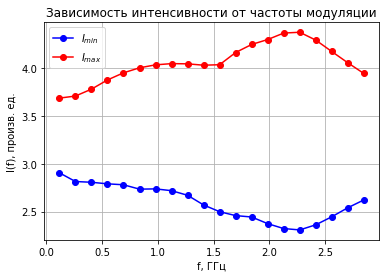

In [22]:
plt.clf()
plt.figure(1)
plt.title('Зависимость интенсивности от частоты модуляции')
plt.xlabel('f, ГГц')
plt.ylabel('I(f), произв. ед.') 
plt.plot(f_axis, I_min, color='blue', label='$I_{min}$', marker='o')
plt.plot(f_axis, I_max, color='red', label='$I_{max}$', marker='o')
plt.legend(loc='best')
plt.grid()
plt.savefig('graph2.1.png',dpi=600)